## Example for reading 3DPOP Dataset

The dataset can be accessed with the dataloader class, by specifying the path to the dataset, the metadata csv and the sequence of interest

In [1]:
##Import Classes
import sys
sys.path.append("../")
import cv2
from POP3D_Reader import Trial 

In [2]:
##Specify Parameters:
Dataset_Path = "/media/alexchan/My Passport/Pop3D-Dataset_Final/" #Put absolute path here
Sequence = 11 #Which Sequence to load

In [3]:
##Load Sequence:
Sequence = Trial.Trial(Dataset_Path,Sequence)
Sequence.load3DPopDataset()

In [4]:
##Get IDs of the pigeon subjects in the specific sequence:
Sequence.Subjects

['47_0107',
 '54_0107',
 '391_0107',
 '452_0107',
 '473_0107',
 '484_0107',
 '485_0107',
 '486_0107',
 '487_0107',
 '705_0107']

#### Now the sequence is loaded, and you can then visualize the data!

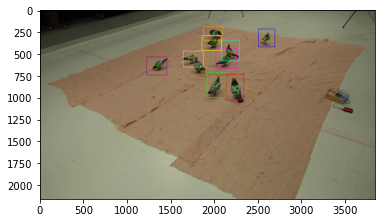

In [5]:
%matplotlib inline

Sequence.VisualizeTrainingData(CamIndex=0,startframe = 6000,
                                save = False, 
                                show=False,
                                points = True, 
                                Lines= True, 
                                BBox=True,
                                Traj=True,
                                MarkersOnly=False,
                                jupyter = True)

#### Ground truth data is stored within camera objects inside each Trial object

In [7]:
##Camera Objects:
print(Sequence.camObjects)

[<POP3D_Reader.CameraObject.CameraObject object at 0x7f45a529ba00>, <POP3D_Reader.CameraObject.CameraObject object at 0x7f45a529b6d0>, <POP3D_Reader.CameraObject.CameraObject object at 0x7f45a5225520>, <POP3D_Reader.CameraObject.CameraObject object at 0x7f45a527d190>]


In [8]:
##Camera 1 Data:
camObj = Sequence.camObjects[0]

##Get Calibration Data:
print("Extrinsics:")
print(camObj.tvec) #translation vector
print(camObj.rvec) #rotation vector (opencv)

print("Intrinsics:")
print(camObj.camMat) #camera matrix (3x3)
print(camObj.distCoef) #distortion coefficient, 5x1

Extrinsics:
[[-111.32829078]
 [-391.99840745]
 [3473.73214315]]
[[ 2.0785023 ]
 [ 0.63161726]
 [-0.38156706]]
Intrinsics:
[[2.59508672e+03 0.00000000e+00 1.88880841e+03]
 [0.00000000e+00 2.58421916e+03 1.07006769e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 0.03526348 -0.06382786 -0.0028523  -0.00257857  0.05049459]]


In [21]:
##Ground truth data:
Key2D = camObj.Keypoint2D
Key3D = camObj.Keypoint3D
BBox = camObj.BBox

In [18]:
## 2D keypoint data (x,y)
Key2D.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,frame,47_0107_bp1_x,47_0107_bp1_y,47_0107_bp2_x,47_0107_bp2_y,47_0107_bp3_x,47_0107_bp3_y,...,705_0107_hd4_x,705_0107_hd4_y,705_0107_hd_beak_x,705_0107_hd_beak_y,705_0107_hd_nose_x,705_0107_hd_nose_y,705_0107_hd_leftEye_x,705_0107_hd_leftEye_y,705_0107_hd_rightEye_x,705_0107_hd_rightEye_y
0,0,0,0,0,2414.089111,277.866302,2418.077393,280.650909,2401.369141,288.458435,...,2077.353271,195.450226,2073.719727,201.572357,2073.662109,197.236786,2069.708740,195.001968,2077.927002,196.413742
1,1,1,1,1,2414.809814,278.377258,2418.905518,281.111481,2402.064209,289.011505,...,2077.448975,195.436661,2073.753662,201.590668,2073.718994,197.243561,2069.786621,194.986206,2078.002197,196.416718
2,2,2,2,2,2416.005371,279.297729,2420.660156,282.366669,2402.986084,289.754517,...,2077.766602,195.311890,2074.049561,201.389633,2074.019531,197.064499,2070.093994,194.835083,2078.311035,196.262054
3,3,3,3,3,2416.670898,279.800507,2421.629395,283.206024,2403.323730,289.909210,...,2077.548584,195.763885,2081.000244,202.886246,2079.221436,198.185043,2073.177002,195.191315,2080.830811,197.271118
4,4,4,4,4,2417.075684,280.022064,2421.967041,283.657776,2403.305664,289.536163,...,2079.859131,197.007141,2090.284668,205.035416,2086.850342,200.030380,2079.092285,196.423309,2085.656738,198.985596


In [19]:
#3D keypoint Data (x,y,z
Key3D.head()

,Unnamed: 0,frame,47_0107_bp1_x,47_0107_bp1_y,47_0107_bp1_z,47_0107_bp2_x,47_0107_bp2_y,47_0107_bp2_z,47_0107_bp3_x,47_0107_bp3_y,...,705_0107_hd_beak_z,705_0107_hd_nose_x,705_0107_hd_nose_y,705_0107_hd_nose_z,705_0107_hd_leftEye_x,705_0107_hd_leftEye_y,705_0107_hd_leftEye_z,705_0107_hd_rightEye_x,705_0107_hd_rightEye_y,705_0107_hd_rightEye_z
0,0,0,11.344204,1818.814082,203.653941,26.958446,1801.437589,205.398796,-8.805122,1813.492946,...,210.127311,-758.465523,1931.933018,221.935333,-756.071082,1913.216083,230.715561,-741.630039,1919.891293,228.320893
1,1,1,13.024937,1818.275374,203.130449,28.769945,1801.025398,204.953782,-7.057378,1812.731723,...,210.068694,-758.424714,1932.077969,221.894385,-755.998611,1913.384392,230.715587,-741.567744,1920.067738,228.282575
2,2,2,15.994259,1816.993318,202.259725,32.525052,1800.436453,203.440667,-4.338580,1810.823605,...,210.368793,-758.060566,1932.589767,222.159428,-755.609701,1913.877621,230.934294,-741.186984,1920.579040,228.502668
3,3,3,17.363177,1816.920256,201.589114,34.330081,1800.776850,202.142400,-3.449535,1810.323627,...,208.078224,-748.537060,1936.259657,220.384831,-751.130409,1917.928326,229.892000,-735.448810,1920.464982,227.344571
4,4,4,17.689078,1817.996846,200.971592,34.596174,1801.782183,201.133800,-3.910561,1811.152545,...,205.366117,-733.641660,1940.082208,217.876789,-741.031377,1923.236183,227.610903,-725.226542,1921.497450,225.157217


In [20]:
#Bounding Box Data (x,y,width,height)
BBox.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,frame,47_0107_BBox_x,47_0107_BBox_y,47_0107_BBox_w,47_0107_BBox_h,54_0107_BBox_x,54_0107_BBox_y,...,486_0107_BBox_w,486_0107_BBox_h,487_0107_BBox_x,487_0107_BBox_y,487_0107_BBox_w,487_0107_BBox_h,705_0107_BBox_x,705_0107_BBox_y,705_0107_BBox_w,705_0107_BBox_h
0,0,0,0,0,2323.584717,177.896591,208.367188,227.707230,NaN,NaN,...,163.306641,194.714630,NaN,NaN,NaN,NaN,1989.134766,147.052948,160.809082,212.107849
1,1,1,1,1,2324.215576,178.007126,208.495605,228.117844,NaN,NaN,...,163.284180,195.010712,NaN,NaN,NaN,NaN,1989.458008,147.051697,160.134766,212.070435
2,2,2,2,2,2324.097656,179.229523,209.344727,227.336487,NaN,NaN,...,163.300659,195.799377,NaN,NaN,NaN,NaN,1990.220215,146.897629,159.444824,212.041855
3,3,3,3,3,2322.991211,182.463913,210.138672,224.765060,NaN,NaN,...,163.358765,196.366394,NaN,NaN,NaN,NaN,1990.970459,147.786316,159.624268,210.916046
4,4,4,4,4,2320.911865,187.472626,219.181641,221.432251,NaN,NaN,...,163.380737,197.035950,NaN,NaN,NaN,NaN,1991.193604,149.461807,159.736084,209.146652


In [35]:
#Helper functions for extracting data from a specific individual for a specific frame:
frame = 6000
bird = "47_0107"
Key2D_Dict = camObj.Read2DKeypointData(camObj.Keypoint2D, frame, bird,Keypoints=None,StripName=False)
Key3D_Dict = camObj.Read3DKeypointData(camObj.Keypoint3D, frame, bird,Keypoints=None,StripName=False)
BBox_Data = camObj.GetBBoxData(camObj.BBox, frame, bird)


In [38]:
print("2D Keypoints:");print(Key2D_Dict)
print("\n3D Keypoints:");print(Key3D_Dict)
print("\nBounding box:");print(BBox_Data)

2D Keypoints:
{'47_0107_bp1': [2592.974365234375, 281.3780212402344], '47_0107_bp2': [2586.139404296875, 285.49566650390625], '47_0107_bp3': [2583.84912109375, 285.2196350097656], '47_0107_bp4': [2576.125244140625, 298.5088195800781], '47_0107_bp_leftShoulder': [2631.73193359375, 298.946044921875], '47_0107_bp_rightShoulder': [2596.009521484375, 322.1016540527344], '47_0107_bp_topKeel': [2621.236572265625, 336.3282470703125], '47_0107_bp_bottomKeel': [2603.0615234375, 360.7674865722656], '47_0107_bp_tail': [2565.414306640625, 320.2944030761719], '47_0107_hd1': [2613.544189453125, 270.4393310546875], '47_0107_hd2': [2620.615478515625, 260.1135559082031], '47_0107_hd3': [2609.859375, 261.5209045410156], '47_0107_hd4': [2613.174072265625, 256.6770935058594], '47_0107_hd_beak': [2611.4765625, 287.4687805175781], '47_0107_hd_nose': [2612.819580078125, 276.8077392578125], '47_0107_hd_leftEye': [2621.412353515625, 268.66973876953125], '47_0107_hd_rightEye': [2607.361328125, 268.197021484375]}